<a href="https://colab.research.google.com/github/Haseeb227/Customer_Churn_prediction-using-ANN/blob/main/Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q keras

In [ ]:
!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML Practice/Churn_Modelling.csv',encoding='latin-1')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
x = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
x_train.shape

(8000, 11)

In [13]:
x_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [14]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

In [17]:
y_train_smt.value_counts()

0    6378
1    6378
Name: Exited, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

In [18]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 672
Trainable params: 672
Non-trainable pa

In [20]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history = model.fit(x_train_scaled,y_train_smt,epochs=100,validation_split=0.2)

Epoch 1/100
319/319 [==============================] - 2s 3ms/step - loss: 0.5723 - accuracy: 0.6992 - val_loss: 0.5046 - val_accuracy: 0.7661
Epoch 2/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4820 - accuracy: 0.7719 - val_loss: 0.5247 - val_accuracy: 0.7257
Epoch 3/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4644 - accuracy: 0.7812 - val_loss: 0.4615 - val_accuracy: 0.7527
Epoch 4/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4533 - accuracy: 0.7911 - val_loss: 0.4732 - val_accuracy: 0.7524
Epoch 5/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.7995 - val_loss: 0.4757 - val_accuracy: 0.7469
Epoch 6/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.8059 - val_loss: 0.5796 - val_accuracy: 0.6897
Epoch 7/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4124 - accuracy: 0.8123 - val_loss: 0.3983 - val_accuracy: 0.8013

In [ ]:
# model.layers[0].get_weights()

In [22]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [23]:
y_pred = np.where(y_log>0.5,1,0)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.829

In [25]:
import matplotlib.pyplot as plt

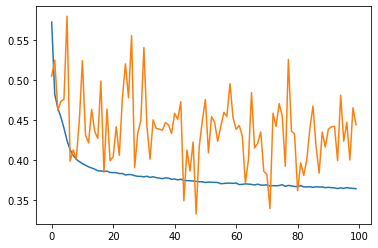

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

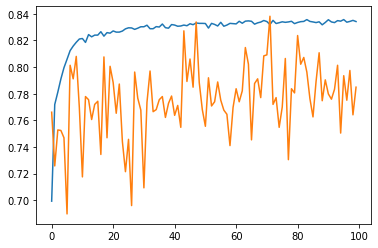

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])